## ML Modelling & Evaluation of Models

In this notebook, I will run the machine learning model for all three models:  
   1) model_bogo  
   2) model_discount 
   3) model_info

For classification, I use the XGBoost Classifier from the sklearn library. XGBoost, short for Extreme Gradient Boosting, stands out as a powerful ensemble learning algorithm. It belongs to the gradient-boosting family of algorithms and has several advantages that make it a top choice for predictive modeling tasks:

1. XGBoost is renowned for its exceptional predictive accuracy. It effectively captures complex relationships in data by iteratively improving the predictive performance with each boosting round.
2. It offers several regularization techniques to prevent overfitting and enhance generalization performance. XGBoost effectively controls model complexity, leading to more robust models.
3. One of the key advantages of XGBoost is its ability to provide insights into feature importance, facilitating better understanding and interpretation of the data.

To leverage the power of XGBoost effectively, I have developed a comprehensive XGBoostModel class, which can be found in the *source/model* folder. This class encapsulates essential functionalities for building, training, and evaluating an XGBoost classifier model. It includes methods for splitting the data into training and testing sets, constructing a preprocessing pipeline, fitting the model, making predictions, and evaluating the model's performance using various metrics such as accuracy, F1 score, and ROC AUC score. This class streamlines the model development process, enabling efficient experimentation with hyperparameters and facilitating the creation of robust and accurate predictive models.

### Load libraries, xgboost model and datasets

In [1]:
import sys
sys.path.append("..")
from source.utils import load_data
from source.model import XGBoostModel


In [2]:
# initiate XGBoost class
model = XGBoostModel()

In [3]:
bogo_data = load_data('../data/bogo_data.pkl')
discount_data = load_data('../data/discount_data.pkl')
info_data = load_data('../data/info_data.pkl')

### Model Evaluation

#### bogo data

We start off with the bogo data. Let's see how good our XGBoost model performs.

In [4]:
# Train xgboost model
X_train, X_test, y_train, y_test = model.split_train_test(bogo_data, 'send_offer')
model.pipeline = model.build_pipeline(X_train)
model.fit_model(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.772 total time=   0.0s
[CV 2/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.761 total time=   0.0s
[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.771 total time=   0.0s
[CV 4/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.766 total time=   0.0s
[CV 5/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.762 total time=   0.0s
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators

In [5]:
# Evaluation
y_pred = model.predict(X_test)
model.evaluate(y_test, y_pred)

Baseline Accuracy (always predict majority class): 0.7711703139866793

Evaluation Metrics:
Accuracy: 0.7740247383444339
F1 Score: 0.8693259972489684
ROC AUC Score: 0.5362100343593249

Confusion Matrix:
[[  94  868]
 [  82 3160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.10      0.17       962
           1       0.78      0.97      0.87      3242

    accuracy                           0.77      4204
   macro avg       0.66      0.54      0.52      4204
weighted avg       0.73      0.77      0.71      4204



To better assess the model performance, I calculated the Accuracy score of a baseline model that only predicts the majority class. As you can see, the baseline accuracy is at 77.1% and the model has an accuracy of 77.4% That represents an uplift of 0.4%. This slight improvement is also reflected in the AUC score of 0.536 which is slightly better than random guessing. The F1 score at 0.869 is fairly good as it shows that precision and recall are well balanced.

In [6]:
model.model.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 25,
 'classifier__objective': 'binary:logistic'}

Above we can see the best model parameter, resulting from hyperparameter tuning. The parameters show that the model is less complex, having a high learning rate, low model depth, and few estimators

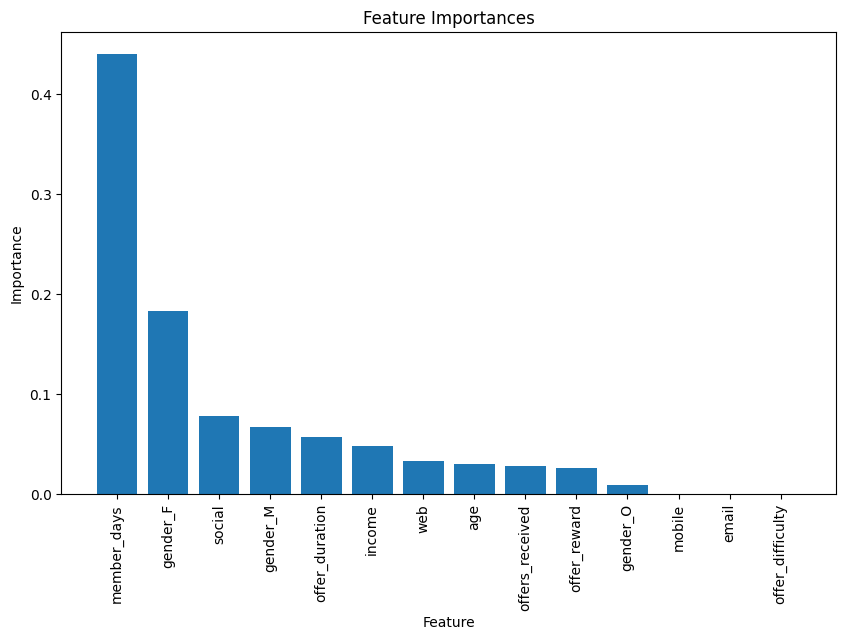

In [7]:
model.plot_feature_importance()

The feature importance graph above allows us to explain the model's decisions by seeing the weight of each feature. The duration of the membership seems to be the most important factor (45%), followed by gender (total of ~25%) and whether the offer is displayed on a social media channel (8%).

#### discount data

Next, let's run the model for discount offers.

In [8]:
# Train xgboost model
X_train, X_test, y_train, y_test = model.split_train_test(discount_data, 'send_offer')
model.pipeline = model.build_pipeline(X_train)
model.fit_model(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.777 total time=   0.0s
[CV 2/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.784 total time=   0.0s
[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.785 total time=   0.0s
[CV 4/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.776 total time=   0.0s
[CV 5/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.776 total time=   0.0s
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators

In [9]:
# Evaluation
y_pred = model.predict(X_test)
model.evaluate(y_test, y_pred)

Baseline Accuracy (always predict majority class): 0.7760052447552448

Evaluation Metrics:
Accuracy: 0.7862762237762237
F1 Score: 0.8747438524590164
ROC AUC Score: 0.5701187573407698

Confusion Matrix:
[[ 183  842]
 [ 136 3415]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.27      1025
           1       0.80      0.96      0.87      3551

    accuracy                           0.79      4576
   macro avg       0.69      0.57      0.57      4576
weighted avg       0.75      0.79      0.74      4576



Looking at the accuracy metrics, we see that the discount model outperformed the baseline model by yielding an uplift of 1.3%. This is also reflected in the AUC score of 0.57. As for the bogo model, the F1 score is also good at 0.875.

In [10]:
model.model.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 3,
 'classifier__n_estimators': 25,
 'classifier__objective': 'binary:logistic'}

The best model parameters for the discount offer model are the same as for bogo data. So it is equally a less complex model.

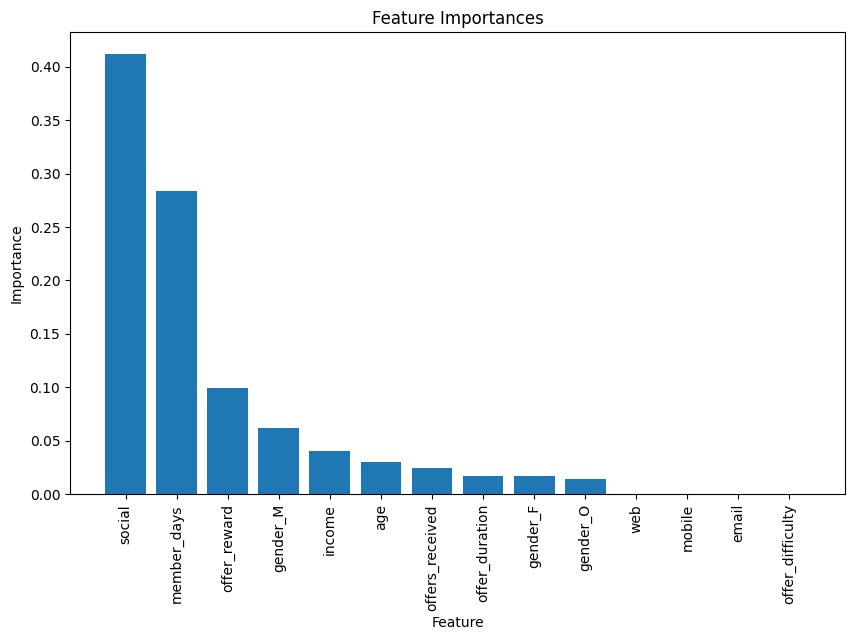

In [11]:
model.plot_feature_importance()

The discount model's feature importance plot looks slightly different than the bogo model's. Here, displaying the offers on social media matters most (41%), followed by the duration of membership (28%) and the offered reward (10%).

#### info data

Lastly, let's run the model for informational offers.

In [12]:
# Train xgboost model
X_train, X_test, y_train, y_test = model.split_train_test(info_data, 'send_offer')
model.pipeline = model.build_pipeline(X_train)
model.fit_model(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.584 total time=   0.2s
[CV 2/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.582 total time=   0.0s
[CV 3/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.582 total time=   0.0s
[CV 4/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.584 total time=   0.0s
[CV 5/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators=25, classifier__objective=binary:logistic;, score=0.584 total time=   0.0s
[CV 1/5] END classifier__learning_rate=0.5, classifier__max_depth=2, classifier__n_estimators

In [13]:
# Evaluation
y_pred = model.predict(X_test)
model.evaluate(y_test, y_pred)

Baseline Accuracy (always predict majority class): 0.5781566021381104

Evaluation Metrics:
Accuracy: 0.6041606472117885
F1 Score: 0.3330087633885102
ROC AUC Score: 0.554154771929104

Confusion Matrix:
[[1749  252]
 [1118  342]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72      2001
           1       0.58      0.23      0.33      1460

    accuracy                           0.60      3461
   macro avg       0.59      0.55      0.53      3461
weighted avg       0.60      0.60      0.56      3461



Comparing the informational with the baseline model, we can observe an uplift of 4.5%. This is also reflected by the AUC score of 0.554. However, the F1 score of 0.33 is quite low, allowing for further improvement in hyperparameter tuning and feature engineering.

In [14]:
model.model.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 2,
 'classifier__n_estimators': 25,
 'classifier__objective': 'binary:logistic'}

The informational model's parameters are slightly different than for bogo and discount offers. The learning rate is lower, making the model more complex but on the other hand, max depth of the ensemble trees is l level lower, resulting in a less complex model.

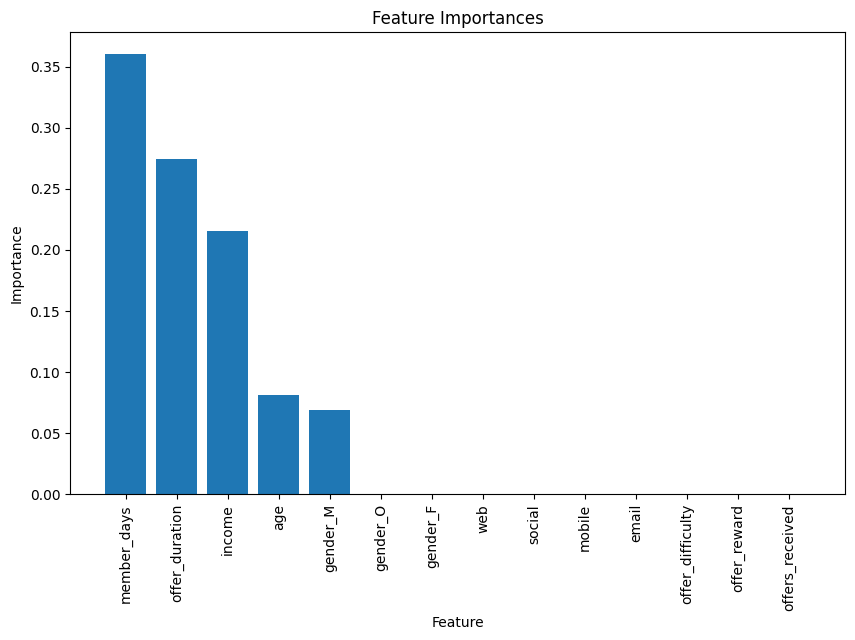

In [15]:
model.plot_feature_importance()

Looking at the feature importance of the model, it is striking that only 5 features have an impact on the model outcome. That is rather low compared to 11 and 10 features that were important for the bogo and discount model. Most important feature is the membership duration (36%), followed by offer duration (27%), and income (22%).

### Discussion of results

For the data at hand, the fitted models are very simple having only 2–3 depth levels and a fairly high learning rate. The number of estimators is also very low in general. This is most likely caused by the small dataset and its few number of features.  
Overall, the results are quite good with the limited data at hand. Especially, the bogo and discount model show high F1 scores which is very good. Although the informational model showed the highest uplift, I am not satisfied with the low F1 score.  
Looking at the feature importance, membership duration is the most important feature overall being in the top 3 features of all models. Displaying offers on social media and gender are important features as well as always being among the top 5 features across the models.  

#### Model development process
The target variable creation process turned out to be very challenging as the transcript dataset was very difficult to process. I spent three days figuring out how to apply the logic to label the instances correctly and tried several approaches until I came up with a feasible solution. Therefore, a bit more support from Starbucks or Udacity would have been helpful to focus more on the modeling part.  
Initially, the performance was significantly lower after having implemented the pos_scale_weight parameter into the XGBoost model. The parameter should scale up or down the positive class until a balanced dataset is reached. Normally, this should help improve the performance of imbalanced data but not in this case. So, I deleted it from the parameter list.  
From the beginning of the model development, I included grid search and cross-validation to make the model robust. I also played a bit around with the range of the hyperparameters and extended the parameter list to the lower end to allow for more simple models which are superior to complex models in our case.

### Conclusion
In the project, I have examined the effectiveness of offers shown in the context of Starbucks' reward program. The pursuit to improve the effectiveness of only sending relevant offers to users resulted in two research questions:  
1. Can a machine-learning classification model accurately predict whether a user will respond to a specific offer type?"
2. What factors influence a user's response to a specific offer type within the rewards program?  

Regarding the first question, I demonstrated that a fine-tuned XGBoost model slightly improves the selection of whom to send an offer. The uplift is fairly high varying between 0.4 and 4.5% resulting in more accurate prediction models than the one used by Starbucks.  
The feature importance analysis revealed that especially membership duration is a significant factor influencing a user's response likelihood. Other factors playing a pivotal role are whether an offer is shown on social media and the gender of a person. Surprisingly age and income only played a minor role for bogo and discount offers. In contrast, income and age are way more important for informational offers.  

#### Limitations and future research
I only had a limited number of data at hand making it difficult to develop a meaningful classification model, especially because I split the data into three datasets. I would also like to try different models which wasn't possible due to time constraints. Applying other machine learning or even deep learning models would be a point for future research. In future research, one could also try to engineer new features or add new variables like temperature, seasonality, etc. to explain more variance in the data.